# Question 1
Name: Pouya Lahabi

Student Code: 400109843

In [52]:
##imports
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from typing import Callable

## Implementation desired difference equation

$$y[n] = 0.5 \times y[n-1] + x[n] - 2 \times x[n-1] + 0.5 \times x[n-2]$$


In [69]:
def system(x:Callable, n):
    if (n <= 0):
        return 0
    if (n == 1):
        return x(1) - 2 * x(0)
    return (0.5 * system(x, n - 1) + x(n) - 2*x(n-1) + 0.5 * x(n - 2))

def y(x: Callable, n: np.array):
    return np.array([system(x, i) for i in n])

## B. checking linearity of systems

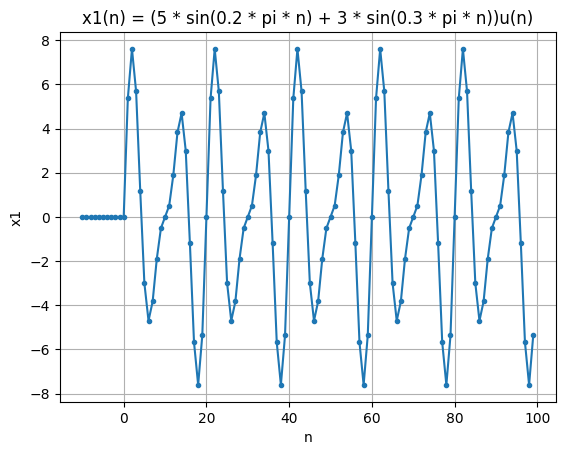

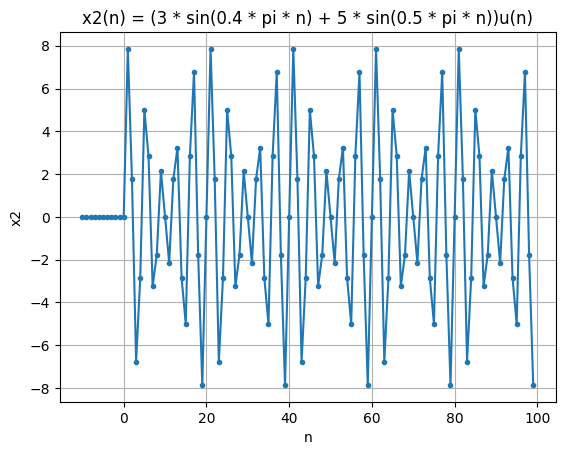

In [92]:
# defining two signals
def x1(n):
    if hasattr(n, "__len__"):
        return np.array([0 if i < 0 else (5 * np.sin(0.2 * np.pi * i) + 3 * np.sin(0.3 * np.pi * i)) for i in n])
    return 0 if n < 0 else (5 * np.sin(0.2 * np.pi * n) + 3 * np.sin(0.3 * np.pi * n))

def x2(n):
    if hasattr(n, "__len__"):
        return  np.array([0 if i < 0 else (3 * np.sin(0.4 * np.pi * i) + 5 * np.sin(0.5 * np.pi * i)) for i in  n])
    return 0 if n < 0 else (3 * np.sin(0.4 * np.pi * n) + 5 * np.sin(0.5 * np.pi * n))

n = np.arange(-10, 100)

plt.title('x1(n) = (5 * sin(0.2 * pi * n) + 3 * sin(0.3 * pi * n))u(n)')
plt.plot(n, x1(n), '.-')
plt.ylabel('x1')
plt.xlabel('n')
plt.grid(True)

plt.show()

plt.title('x2(n) = (3 * sin(0.4 * pi * n) + 5 * sin(0.5 * pi * n))u(n)')
plt.plot(n, x2(n), '.-')
plt.ylabel('x2')
plt.xlabel('n')
plt.grid(True)

plt.show()


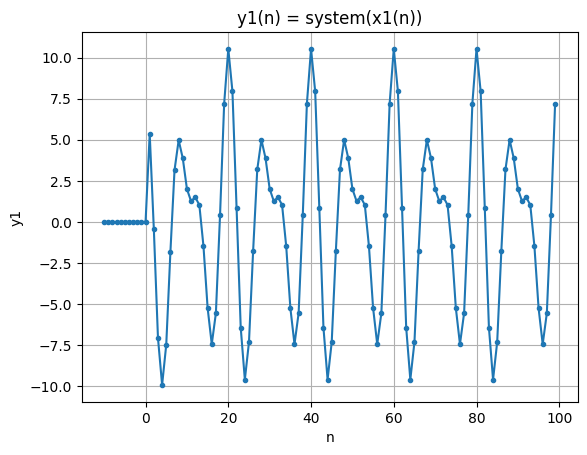

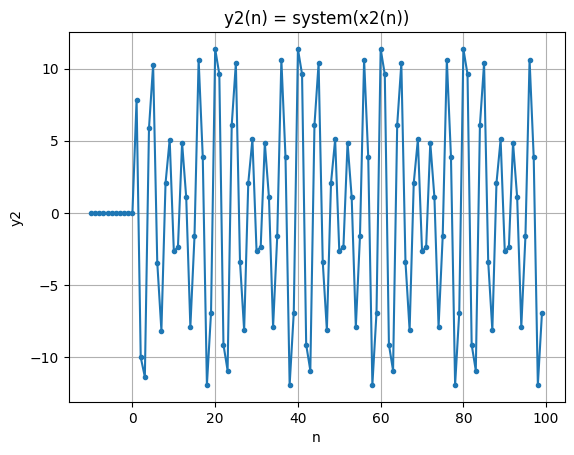

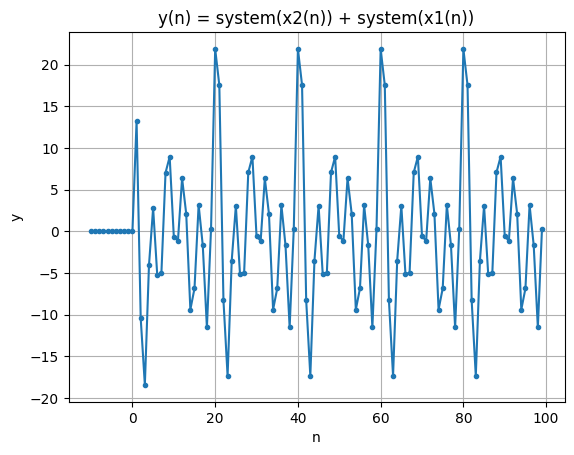

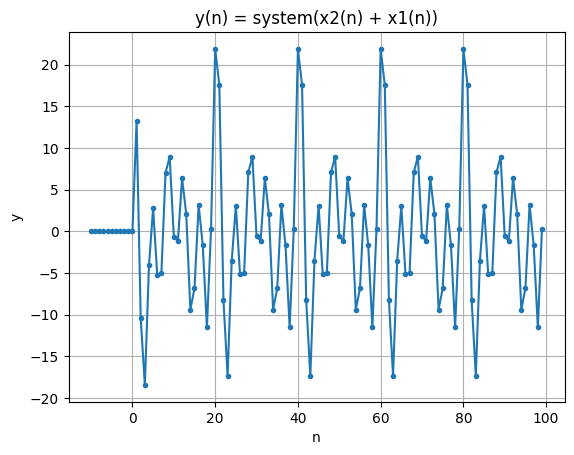

In [88]:
# vizualing output of system to x1(n) and x2(n)

plt.title('y1(n) = system(x1(n))')
plt.plot(n, y(x1, n), '.-')
plt.ylabel('y1')
plt.xlabel('n')
plt.grid(True)

plt.show()

plt.title('y2(n) = system(x2(n))')
plt.plot(n, y(x2, n), '.-')
plt.ylabel('y2')
plt.xlabel('n')
plt.grid(True)

plt.show()

## plot sum of responses

plt.title('y(n) = system(x2(n)) + system(x1(n))')
plt.plot(n, y(x1, n) + y(x2, n), '.-')
plt.ylabel('y')
plt.xlabel('n')
plt.grid(True)

plt.show()

## plot response to sum of signals

plt.title('y(n) = system(x2(n) + x1(n))')
plt.plot(n, y(lambda n: x1(n) + x2(n), n), '.-')
plt.ylabel('y')
plt.xlabel('n')
plt.grid(True)

plt.show()


as expected this system is linear

## C. Time-Invariance

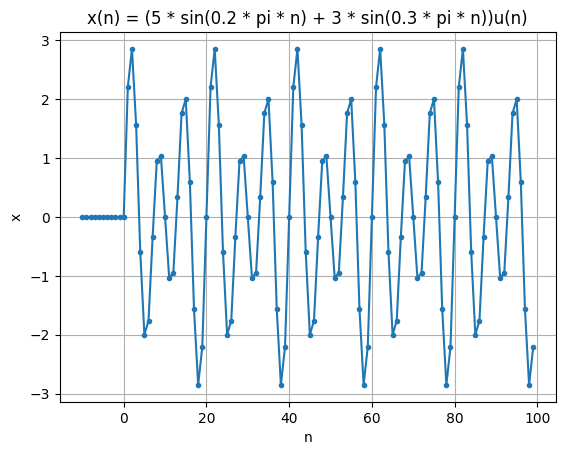

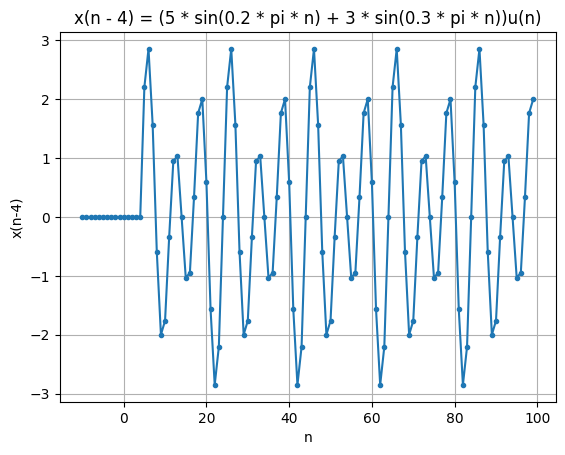

In [101]:
def x(n):
    if hasattr(n, "__len__"):
        return np.array([0 if i < 0 else (np.sin(0.2 * np.pi * i) + 2 * np.sin(0.3 * np.pi * i)) for i in n])
    return 0 if n < 0 else (np.sin(0.2 * np.pi * n) + 2 * np.sin(0.3 * np.pi * n))

x_shifted = lambda n: x(n-4)

plt.title('x(n) = (5 * sin(0.2 * pi * n) + 3 * sin(0.3 * pi * n))u(n)')
plt.plot(n, x(n), '.-')
plt.ylabel('x')
plt.xlabel('n')
plt.grid(True)

plt.show()

plt.title('x(n - 4) = (5 * sin(0.2 * pi * n) + 3 * sin(0.3 * pi * n))u(n)')
plt.plot(n, x_shifted(n), '.-')
plt.ylabel('x(n-4)')
plt.xlabel('n')
plt.grid(True)

plt.show()


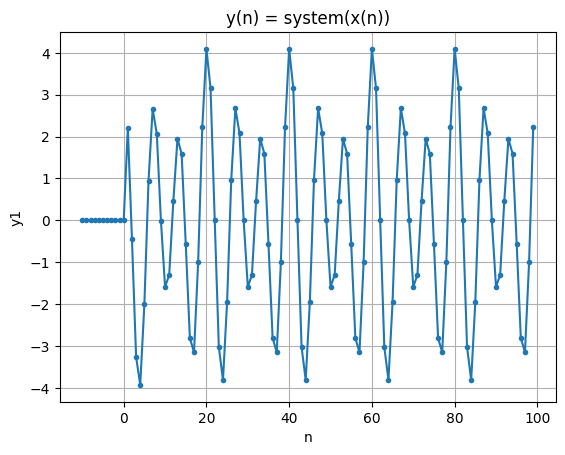

In [102]:
## plotting response of system to normal signal
plt.title('y(n) = system(x(n))')
plt.plot(n, y(x, n), '.-')
plt.ylabel('y1')
plt.xlabel('n')
plt.grid(True)

plt.show()

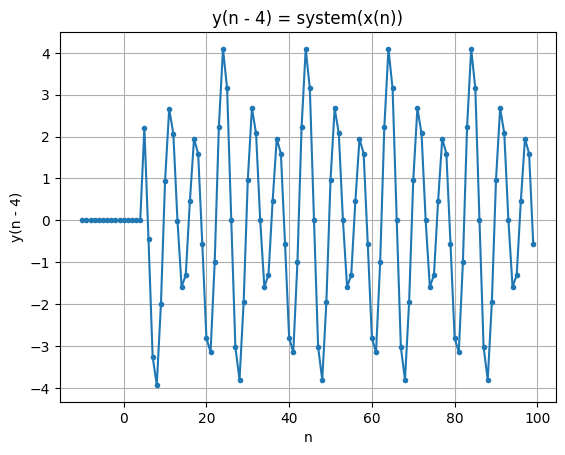

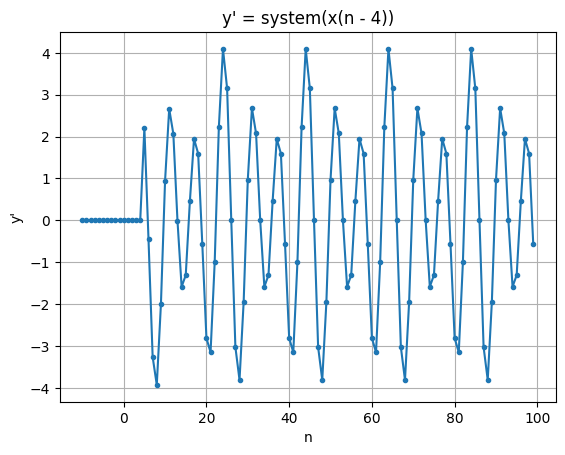

In [106]:
# plot shifted response to normal signal
plt.title('y(n - 4) = system(x(n))')
plt.plot(n, y(x, n - 4), '.-')
plt.ylabel('y(n - 4)')
plt.xlabel('n')
plt.grid(True)

plt.show()

## plot response of system to shifted signal
plt.title('y\' = system(x(n - 4))')
plt.plot(n, y(x_shifted, n), '.-')
plt.ylabel('y\'')
plt.xlabel('n')
plt.grid(True)

plt.show()


since both shifted response and response to she shifted signal are the same, this system is time invariant

## D. response to impulse ans step signal

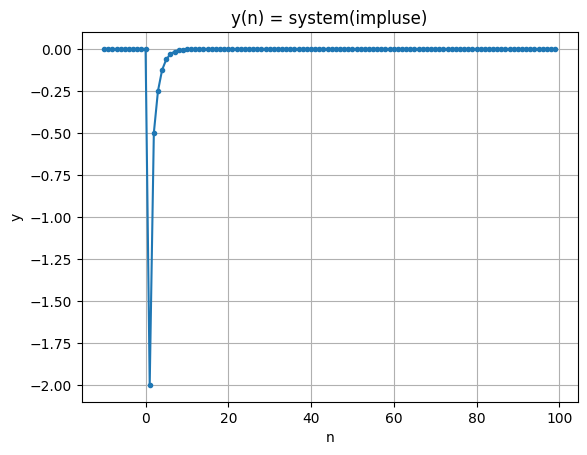

In [117]:
## response to impulse
def impulse(n):
    if hasattr(n, "__len__"):
        return np.array([1 if i == 0 else 0 for i in n])
    return 1 if n == 0 else 0

plt.title('y(n) = system(impulse)')
plt.plot(n, y(impulse, n), '.-')
plt.ylabel('y')
plt.xlabel('n')
plt.grid(True)

plt.show()

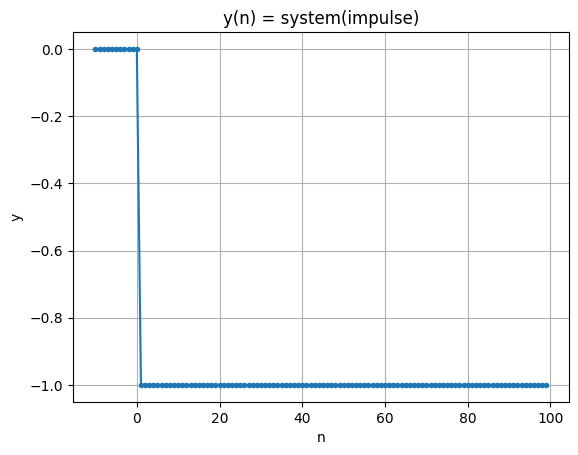

In [118]:
## response to step signal
def impulse(n):
    if hasattr(n, "__len__"):
        return np.array([1 if i >= 0 else 0 for i in n])
    return 1 if n >= 0 else 0

plt.title('y(n) = system(impulse)')
plt.plot(n, y(impulse, n), '.-')
plt.ylabel('y')
plt.xlabel('n')
plt.grid(True)

plt.show()

since response to impulse signal is zero for n less than zero this system in casual